# 5. Image enhancement – histogram equalization

In [163]:
import cv2
import os
import numpy as np

from matplotlib import pyplot as plt
from scipy import ndimage

### **a)** Take a low contrast grayscale image and plot its histogram

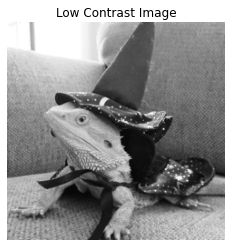

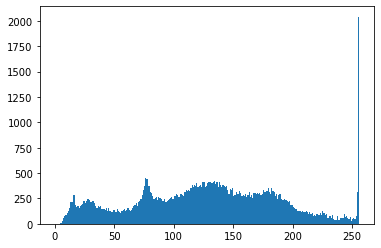

In [164]:
image = cv2.imread("Images/lizard.bmp", 0)

plt.imshow(image, cmap="gray")
plt.title('Low Contrast Image')
plt.axis('off')
plt.show()

plt.hist(image.ravel(), 256, [0,256]) 
plt.show()

### **b)** Enhance the image constrast using:
#### **b1)** simple histogram equalization

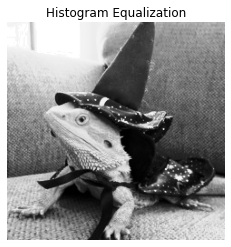

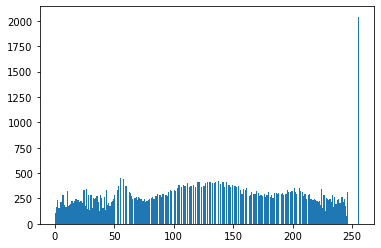

In [165]:
equalization = cv2.equalizeHist(image)

plt.imshow(equalization, cmap="gray")
plt.title('Histogram Equalization')
plt.axis('off')
plt.show()

plt.hist(equalization.ravel(), 256, [0, 256]) 
plt.show()

#### **b2)** CLAHE

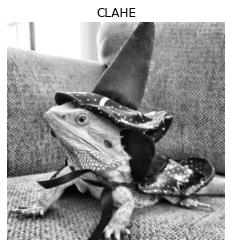

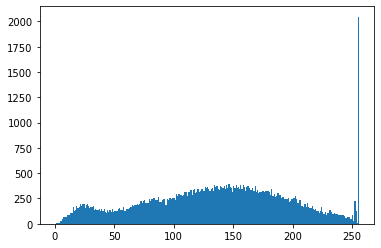

In [166]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

plt.imshow(clahe_image, cmap="gray")
plt.title('CLAHE')
plt.axis('off')
plt.show()

plt.hist(clahe_image.ravel(), 256, [0, 256]) 
plt.show()

### **c)** Repeat the previous operations on a color image

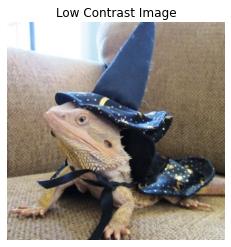

In [167]:
image = cv2.imread("Images/lizard.bmp", 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB because we are using matplotlib to display the image

plt.imshow(image)
plt.title('Low Contrast Image')
plt.axis('off')
plt.show()

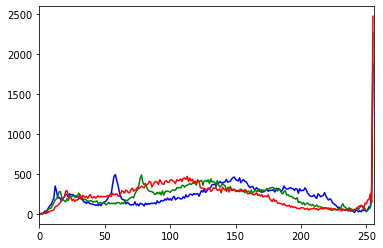

In [168]:
def plot_histogram(image):
    color = ('b', 'g', 'r')

    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histr, color=col)
        plt.xlim([0, 256])

    plt.show()

plot_histogram(image)

#### Histogram equalization

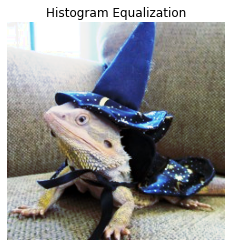

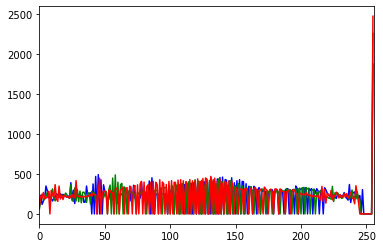

In [169]:
channels = cv2.split(image)
eq_channels = []

for channel, color in zip(channels, ['R', 'G', 'B']):
    eq_channels.append(cv2.equalizeHist(channel))

equalization = cv2.merge(eq_channels)

plt.imshow(equalization)
plt.title('Histogram Equalization')
plt.axis('off')
plt.show()

plot_histogram(equalization)

#### CLAHE

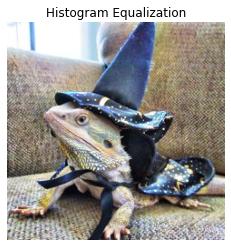

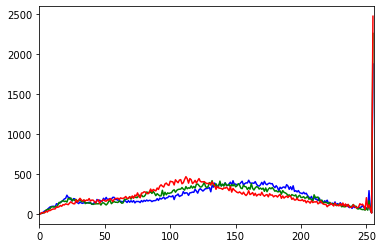

In [170]:
channels = cv2.split(image)
eq_channels = []
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

for channel, color in zip(channels, ['R', 'G', 'B']):
    clahe_channel = clahe.apply(channel)

    eq_channels.append(clahe_channel)

clahe_image = cv2.merge(eq_channels)

plt.imshow(clahe_image)
plt.title('Histogram Equalization')
plt.axis('off')
plt.show()

plot_histogram(clahe_image)